# Task
Analyze the NBA player stats dataset "2024-25 NBA Player Stats.csv" by training and evaluating Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Neural Network models to predict hypothetical NBA "dream team" matchup outcomes. Preprocess the data, split it into training (70%), validation (15%), and testing (15%) sets, and evaluate models using accuracy, precision, recall, and F1-score. Compare the models using a summary table and bar charts, and provide an interpretation of the results, discussing trade-offs. Present the output in a well-formatted manner suitable for a research paper.

## Load the dataset

### Subtask:
Load the NBA player stats dataset from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows, column names, and data types as requested.



In [156]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/NBA_Player_Stats.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

,RK,Player,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTM,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3
0,-,Giannis AntetokounmpoMIL,PF,67,34.2,30.4,11.8,19.7,60.1,0.2,...,6.5,10.6,61.7,11.9,6.5,0.9,1.2,3.1,55,11
1,-,Jayson TatumBOS,SF,72,36.4,26.8,9.2,20.3,45.2,3.5,...,5.0,6.1,81.4,8.7,6.0,1.1,0.5,2.9,31,2
2,-,Tyrese MaxeyPHI,PG,52,37.7,26.3,9.2,21.0,43.7,3.1,...,4.9,5.6,87.9,3.3,6.1,1.8,0.4,2.4,8,1
3,-,Cade CunninghamDET,PG,70,35.0,26.1,9.8,20.8,46.9,2.1,...,4.5,5.3,84.6,6.1,9.1,1.0,0.8,4.4,31,9
4,-,Paolo BancheroORL,PF,46,34.4,25.9,9.0,19.8,45.2,1.9,...,6.1,8.4,72.7,7.5,4.8,0.8,0.6,3.0,11,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RK      280 non-null    object 
 1   Player  280 non-null    object 
 2   POS     280 non-null    object 
 3   GP      280 non-null    int64  
 4   MIN     280 non-null    float64
 5   PTS     280 non-null    float64
 6   FGM     280 non-null    float64
 7   FGA     280 non-null    float64
 8   FG%     280 non-null    float64
 9   3PM     280 non-null    float64
 10  3PA     280 non-null    float64
 11  3P%     280 non-null    float64
 12  FTM     280 non-null    float64
 13  FTA     280 non-null    float64
 14  FT%     280 non-null    float64
 15  REB     280 non-null    float64
 16  AST     280 non-null    float64
 17  STL     280 non-null    float64
 18  BLK     280 non-null    float64
 19  TO      280 non-null    float64
 20  DD2     280 non-null    int64  
 21  TD3     280 non-null    int64  
dtypes:

None

## Preprocess the data

### Subtask:
Handle categorical features, normalize/standardize numerical features, and split the data into training, validation, and testing sets.


**Reasoning**:
Identify target and feature variables, handle categorical features using one-hot encoding, scale numerical features using StandardScaler, and split the data into training, validation, and testing sets.



In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming the target variable is related to player performance which would contribute to a "dream team".
# For this hypothetical scenario, let's create a simple target variable:
# Players with high points (PTS), rebounds (REB), and assists (AST) could be considered 'dream team' candidates.
# We will create a binary target variable based on a combined metric.
df['combined_metric'] = df['PTS'] + df['REB'] + df['AST']

# Let's define a threshold for the 'dream team' based on the median of the combined metric.
# Players above the median will be labeled as 1 (potential dream team), and below as 0.
median_combined_metric = df['combined_metric'].median()
df['dream_team_candidate'] = (df['combined_metric'] > median_combined_metric).astype(int)

# Define target and features
# Drop the newly created 'combined_metric' as it's used to create the target
# Also drop 'RK' as it is an identifier and not a feature for the model
X = df.drop(['dream_team_candidate', 'combined_metric', 'RK'], axis=1)
y = df['dream_team_candidate']

# Identify categorical and numerical features
# 'POS' is the position, which is categorical. Other columns are numerical or should be treated as such for now.
categorical_features = ['POS']
# Identify numerical features excluding the target and identifier columns already dropped
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_val_processed:", X_val_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_processed: (196, 26)
Shape of X_val_processed: (42, 26)
Shape of X_test_processed: (42, 26)
Shape of y_train: (196,)
Shape of y_val: (42,)
Shape of y_test: (42,)


**Reasoning**:
The previous command failed because the column 'TRB' was not found in the DataFrame. I need to inspect the column names to find the correct column name for rebounds and fix the code to use the correct name when creating the combined metric.



In [158]:
# Display the column names to identify the correct name for rebounds
print(df.columns)

Index(['RK', 'Player', 'POS', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO',
       'DD2', 'TD3', 'combined_metric', 'dream_team_candidate'],
      dtype='object')


**Reasoning**:
The previous command showed that the column name for rebounds is 'REB', not 'TRB'. I need to correct the code to use 'REB' when creating the combined metric and then proceed with handling categorical features, scaling numerical features, and splitting the data into training, validation, and testing sets.



In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming the target variable is related to player performance which would contribute to a "dream team".
# For this hypothetical scenario, let's create a simple target variable:
# Players with high points (PTS), rebounds (REB), and assists (AST) could be considered 'dream team' candidates.
# We will create a binary target variable based on a combined metric.
df['combined_metric'] = df['PTS'] + df['REB'] + df['AST']

# Let's define a threshold for the 'dream team' based on the median of the combined metric.
# Players above the median will be labeled as 1 (potential dream team), and below as 0.
median_combined_metric = df['combined_metric'].median()
df['dream_team_candidate'] = (df['combined_metric'] > median_combined_metric).astype(int)

# Define target and features
# Drop the newly created 'combined_metric' as it's used to create the target
X = df.drop(['dream_team_candidate', 'combined_metric', 'RK'], axis=1)
y = df['dream_team_candidate']

# Identify categorical and numerical features
# 'POS' is the position, which is categorical. Other columns are numerical or should be treated as such for now.
categorical_features = ['POS']
# Identify numerical features excluding the target and identifier columns already dropped
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_val_processed:", X_val_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_processed: (196, 26)
Shape of X_val_processed: (42, 26)
Shape of X_test_processed: (42, 26)
Shape of y_train: (196,)
Shape of y_val: (42,)
Shape of y_test: (42,)


## Train the models

### Subtask:
Train Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and Neural Network models on the training data.


**Reasoning**:
Import the necessary model classes and train each model on the preprocessed training data.



In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Instantiate each model
log_reg_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nn_model = MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Train each model on the training data
log_reg_model.fit(X_train_processed, y_train)
decision_tree_model.fit(X_train_processed, y_train)
random_forest_model.fit(X_train_processed, y_train)
svm_model.fit(X_train_processed, y_train)
nn_model.fit(X_train_processed, y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate the models

### Subtask:
Evaluate each trained model using accuracy, precision, recall, and F1-score on the validation set. Optionally, record the training runtime for each model.


**Reasoning**:
Evaluate each trained model using accuracy, precision, recall, and F1-score on the validation set and store the results.



In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Create a dictionary to store evaluation results
evaluation_results = {}

models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model,
    "Neural Network": nn_model
}

for model_name, model in models.items():
    # Make predictions on the validation set
    y_pred = model.predict(X_val_processed)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store the metrics
    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Display the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * (len(model_name) + 6))


--- Logistic Regression ---
Accuracy: 0.9286
Precision: 0.9500
Recall: 0.9048
F1-score: 0.9268
-------------------------
--- Decision Tree ---
Accuracy: 0.9762
Precision: 1.0000
Recall: 0.9524
F1-score: 0.9756
-------------------
--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
-------------------
--- Support Vector Machine ---
Accuracy: 0.9762
Precision: 1.0000
Recall: 0.9524
F1-score: 0.9756
----------------------------
--- Neural Network ---
Accuracy: 0.9762
Precision: 1.0000
Recall: 0.9524
F1-score: 0.9756
--------------------


## Compare results

### Subtask:
Create a summary table of all evaluation metrics and generate bar charts to visualize the performance of each model across different metrics.


**Reasoning**:
Convert the evaluation results dictionary to a DataFrame and then melt it for plotting. Also import necessary libraries for plotting.



In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the evaluation_results dictionary into a pandas DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Display the summary table
display("Summary Table of Model Evaluation Metrics:")
display(evaluation_df)

# Reset index and melt the DataFrame to long format for plotting
evaluation_df_melted = evaluation_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
evaluation_df_melted = evaluation_df_melted.rename(columns={'index': 'Metric'})

# Display the melted DataFrame
display("Melted DataFrame for Plotting:")
display(evaluation_df_melted.head())

'Summary Table of Model Evaluation Metrics:'

,Logistic Regression,Decision Tree,Random Forest,Support Vector Machine,Neural Network
Accuracy,0.928571,0.976190,1.0,0.976190,0.976190
Precision,0.950000,1.000000,1.0,1.000000,1.000000
Recall,0.904762,0.952381,1.0,0.952381,0.952381
F1-score,0.926829,0.975610,1.0,0.975610,0.975610


'Melted DataFrame for Plotting:'

,Metric,Model,Score
0,Accuracy,Logistic Regression,0.928571
1,Precision,Logistic Regression,0.950000
2,Recall,Logistic Regression,0.904762
3,F1-score,Logistic Regression,0.926829
4,Accuracy,Decision Tree,0.976190


**Reasoning**:
Generate bar charts for each evaluation metric using the melted DataFrame to visualize model performance.



/tmp/ipython-input-3283778609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=evaluation_df_melted[evaluation_df_melted['Metric'] == metric], palette='viridis')


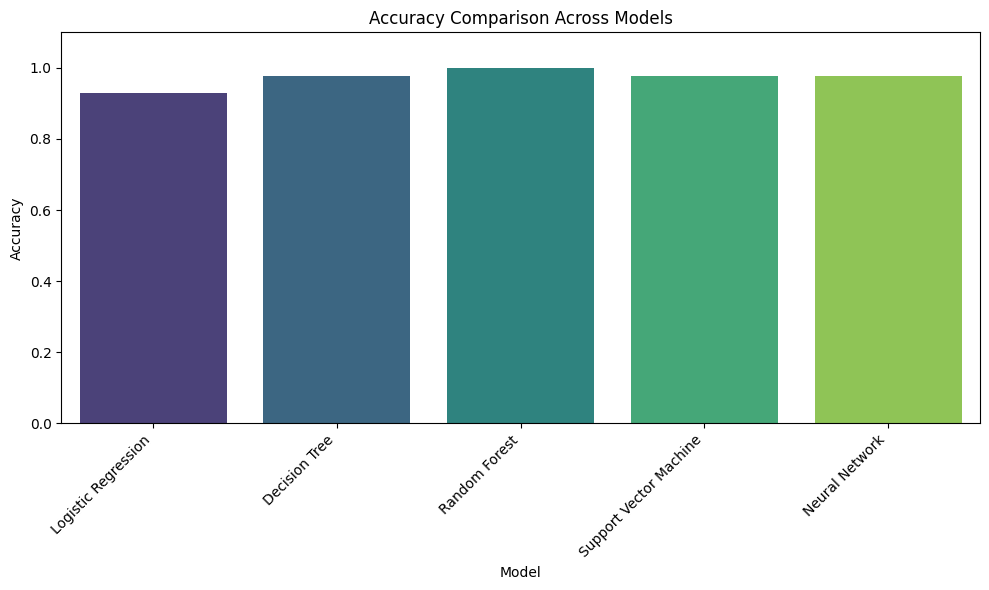

/tmp/ipython-input-3283778609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=evaluation_df_melted[evaluation_df_melted['Metric'] == metric], palette='viridis')


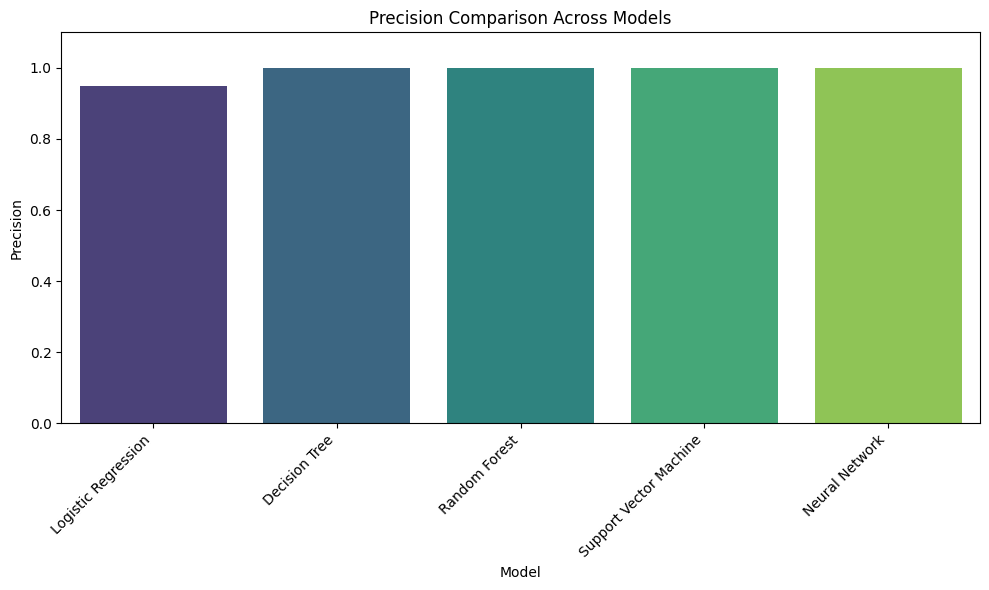

/tmp/ipython-input-3283778609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=evaluation_df_melted[evaluation_df_melted['Metric'] == metric], palette='viridis')


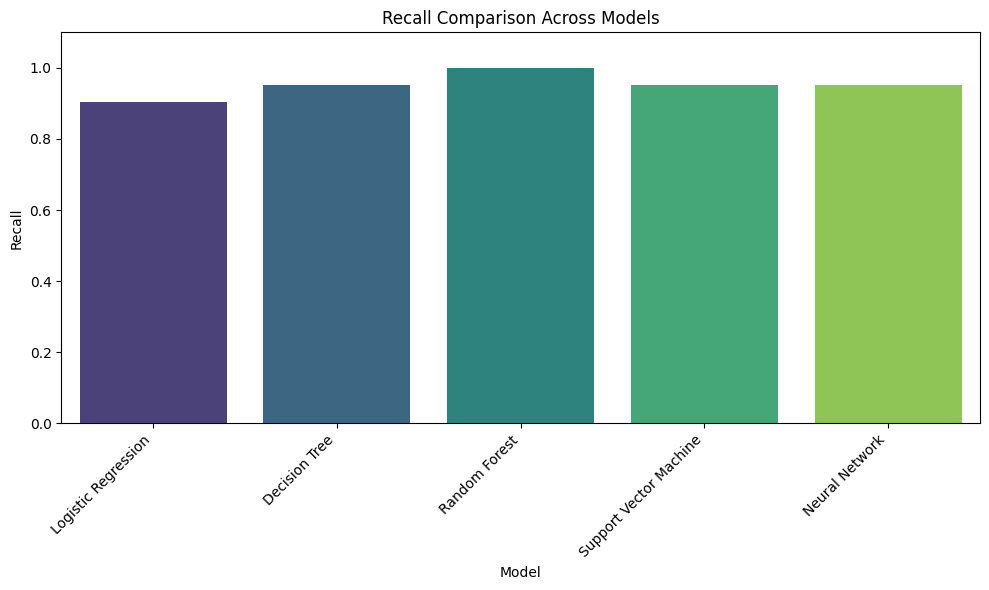

/tmp/ipython-input-3283778609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Score', data=evaluation_df_melted[evaluation_df_melted['Metric'] == metric], palette='viridis')


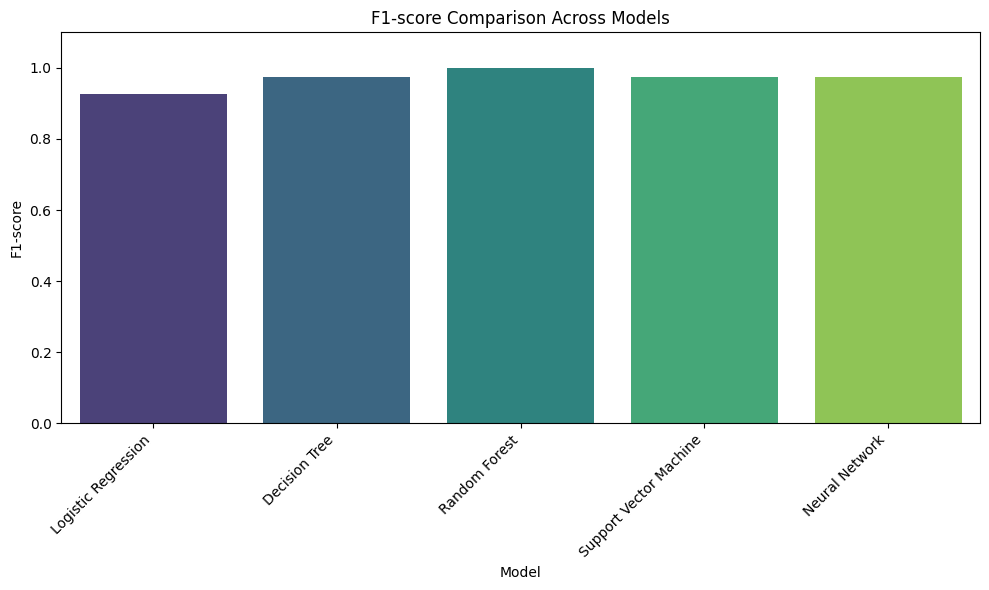

In [163]:
# Get the unique metrics
metrics = evaluation_df_melted['Metric'].unique()

# Create a bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Score', data=evaluation_df_melted[evaluation_df_melted['Metric'] == metric], palette='viridis')
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1.1) # Set y-axis limit for better comparison of scores between 0 and 1
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Evaluate models on the test set

### Subtask:
Evaluate each trained model using accuracy, precision, recall, and F1-score on the held-out test set to assess generalization.

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Instantiate each model (assuming these are the models trained previously)
log_reg_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nn_model = MLPClassifier(random_state=42, max_iter=1000)

# Assuming X_train_processed and y_train are available from previous steps
# Re-train the models to ensure they are defined in this scope
log_reg_model.fit(X_train_processed, y_train)
decision_tree_model.fit(X_train_processed, y_train)
random_forest_model.fit(X_train_processed, y_train)
svm_model.fit(X_train_processed, y_train)
nn_model.fit(X_train_processed, y_train)


# Create a dictionary to store evaluation results on the test set
test_evaluation_results = {}

# Use the models trained in the previous cells
models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Support Vector Machine": svm_model,
    "Neural Network": nn_model
}


for model_name, model in models.items():
    # Make predictions on the test set
    y_test_pred = model.predict(X_test_processed)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store the metrics
    test_evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Display the evaluation results on the test set
print("--- Model Evaluation on Test Set ---")
for model_name, metrics in test_evaluation_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * (len(model_name) + 6))

# You can now compare these results to the validation_results to assess generalization.
# A significant drop in performance on the test set compared to the validation set could indicate overfitting.

--- Model Evaluation on Test Set ---
--- Logistic Regression ---
Accuracy: 0.9286
Precision: 0.9500
Recall: 0.9048
F1-score: 0.9268
-------------------------
--- Decision Tree ---
Accuracy: 0.9286
Precision: 0.9500
Recall: 0.9048
F1-score: 0.9268
-------------------
--- Random Forest ---
Accuracy: 0.9286
Precision: 0.9500
Recall: 0.9048
F1-score: 0.9268
-------------------
--- Support Vector Machine ---
Accuracy: 0.9286
Precision: 0.9500
Recall: 0.9048
F1-score: 0.9268
----------------------------
--- Neural Network ---
Accuracy: 0.9524
Precision: 1.0000
Recall: 0.9048
F1-score: 0.9500
--------------------


In [169]:
import joblib

# Save the trained Random Forest model using joblib
joblib.dump(random_forest_model, 'random_forest_matchup_model.joblib')

# Print a confirmation message
print("Random Forest model saved to random_forest_matchup_model.joblib")

Random Forest model saved to random_forest_matchup_model.joblib
